<center><h1>K Means</h1></center>

<center><h2>Step 1:  Importing and Cleaning the Data</h2></center>

The data set is stored in a file in this folder called "dataset.csv".  Use pandas to import the data set into a data frame.  Call the data frame whatever you like.  How will you deal with missing values?

In [15]:
# Import the Data Set here.
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None

df = pd.read_csv("dataset.csv")

# Fix all unknown values
for column in df.columns:
    try: df[column][df[column] == "?"] = float('NaN')
    except: continue
for column in df.columns[1:]:
    df[column] = df[column].fillna(df[column].median())

print(df)


           Date    Q-E  ZN-E  PH-E  DBO-E DQO-E SS-E SSV-E SED-E  COND-E  \
0      D-1/3/90  44101  1.50   7.8  182.5   407  166  66.3   4.5    2110   
1      D-2/3/90  39024  3.00   7.7  182.5   443  214  69.2   6.5    2660   
2      D-4/3/90  32229  5.00   7.6  182.5   528  186  69.9   3.4    1666   
3      D-5/3/90  35023  3.50   7.9    205   588  192  65.6   4.5    2430   
4      D-6/3/90  36924  1.50   8.0    242   496  176  64.8   4.0    2110   
5      D-7/3/90  38572  3.00   7.8    202   372  186  68.8   4.5    1644   
6      D-8/3/90  41115  6.00   7.8  182.5   552  262  64.1   5.0    1603   
7      D-9/3/90  36107  5.00   7.7    215   489  334  40.7   6.0    1613   
8     D-11/3/90  29156  2.50   7.7    206   451  194  69.1   4.5    1249   
9     D-12/3/90  39246  2.00   7.8    172   506  200  69.0   5.0    1865   
10    D-13/3/90  42393  0.70   7.9    189   478  230  67.0   5.5    1410   
11    D-14/3/90  42857  1.50   7.7    238   319  292  33.8   3.5    1261   
12    D-15/3

/Users/Nick/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


<center><h2>Step 2: Exploring the Data</h2></center>

Now, you should explore your data.  Get a feel for it using summary statistics, and graphs!  If you're taking this step seriously, you should be graphing a ton of stuff. Some will end up being useful.  Alot of it won't.

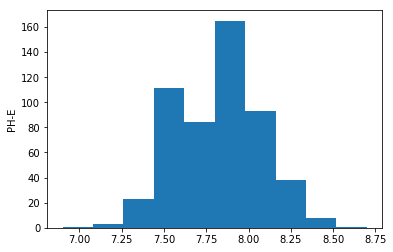

In [16]:
# Explore the data set here!
import matplotlib.pyplot as plt

# Plot ages
plt.figure(1)
plt.ylabel("PH-E")
plt.hist(df["PH-E"])

plt.show()


<center><h2>Step 3: Training a Classifier</h2></center>

You've cleaned your data, and split into training and testing sets, and explored your data frame.  Now, on to the fun stuff--let's create and train a Decision Tree Classifier!  Create a Decision Tree Classifier and fit it to your training set.  If you're not sure how, check out the sklearn docs for Decision Tree Classifiers!

[[  7.89710145   7.06521739]
 [  7.77560976   2.04390244]
 [  7.73333333  23.66666667]
 [  7.79875776   4.30496894]
 [  7.775       14.        ]
 [  7.6         36.        ]
 [  7.7742268    3.22886598]
 [  7.83454545   5.40181818]]


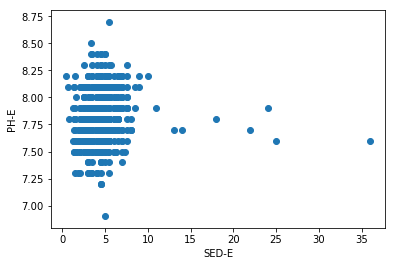

In [42]:
from sklearn.cluster import KMeans

features = df[["PH-E", "SED-E"]]

# Fit model
model = KMeans().fit(features)
print(model.cluster_centers_)

# Show plot
plt.figure(1)
plt.ylabel("PH-E")
plt.xlabel("SED-E")
plt.scatter(df["SED-E"], df["PH-E"])

plt.show()



<center><h2>Step 4: Evaluating our Model</h2></center>

We've trained our model, but **_can we trust our results?_** Use your Decision Tree Classifier to predict the outcomes of the items in your testing set.  Now that we have the results of our testing set predictions, let's calculate our F1 Score to see how we did.  If you aren't sure how to calculate the F1 Score, refer to the docs! 